# ARIMA CODING

I'll be implementing and autoregressive integrated moving average model. An autoregressive integrated moving average mode, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values. I'll load the libraries and start the process of modeling. I'll build a base model and a second model choosing a best model. As the objective is to find the ZIP Codes in a particular market that predict the best ROI.

## Loading data sets and libraries

In [1]:
#!pip install
%store -r df
%matplotlib inline

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')

In [3]:
#checking the data set
df.head(5)

,Zipcode,ROI_5yr,ROI_3yr,value
Date,,,,
2008-01-01,6606,0.3202,0.2165,252300.0
2008-01-01,6705,0.0056,0.1964,152500.0
2008-01-01,6604,0.3141,0.3166,274700.0
2008-01-01,6610,0.2999,0.3111,216600.0
2008-01-01,6351,0.1183,0.2234,217300.0


### Time Series Process

The data set has to be prepared to for modeling. The correct process for managing Time Series correctly includes: 
1. Grouping the data set and creating a Time Series (TS)
2. Converting to Pandas DataFrame and Visualization
3. Conceptual Soundness -Set up for Modeling (Understanding Time Series-ACF & PACF, Differencing & Decomposition)
4. Stats Models- Visualizing ACF & PACF
4. Stats Models- Differencing Detrending Transformation
5. Modeling - Predictions and Results

### 1. Grouping the data set

In [4]:
#Making a Zipcode list
#taking the unique ZIP Code values and fitting them to the list
zipcode_list = df['Zipcode'].unique().tolist()

In [5]:
#Creating a TS (time series) dictionary and loop
TS = {}
for zipcode in zipcode_list:
    temp_df = df.groupby('Zipcode').get_group(zipcode).sort_index()['value']
    TS[zipcode] = temp_df #df.loc[district]

In [6]:
#Looking at the keys in the TS dictionary
TS.keys()

dict_keys(['6606', '6705', '6604', '6610', '6351', '6706', '6359', '6069', '6330', '6039', '6235', '6068', '6796'])

In [7]:
#Looking at ZIP Code 6706 in the dictionary now that ZIP Codes are grouped
#note that Date is index, group is the the ZIP Code by descending value
TS['6706']

Date
2008-01-01    152200.0
2008-02-01    151200.0
2008-03-01    150300.0
2008-04-01    149600.0
2008-05-01    149200.0
                ...   
2017-12-01    108900.0
2018-01-01    109800.0
2018-02-01    109500.0
2018-03-01    109000.0
2018-04-01    108600.0
Name: value, Length: 124, dtype: float64

### Converting (To Pandas DataFrame)

Now we are going to convert and visualize the TS dictionary created and put it into a Pandas DataFrame. The Pandas DataFrame for time series shows from 2008 through 2018 montly values under each of the ZIP Codes.

In [8]:
#Converting TS dictionary into Pandas DataFrame calling it ts_df
ts_df = pd.DataFrame(TS)
ts_df.head()

,6606,6705,6604,6610,6351,6706,6359,6069,6330,6039,6235,6068,6796
Date,,,,,,,,,,,,,
2008-01-01,252300.0,152500.0,274700.0,216600.0,217300.0,152200.0,282100.0,436300.0,232100.0,535900.0,228700.0,511000.0,532000.0
2008-02-01,249500.0,151300.0,271300.0,213100.0,214400.0,151200.0,282000.0,437000.0,230400.0,537700.0,226500.0,512400.0,531800.0
2008-03-01,247000.0,150200.0,268600.0,210100.0,212800.0,150300.0,282100.0,436300.0,228900.0,538100.0,224400.0,513100.0,530900.0
2008-04-01,244700.0,149100.0,266600.0,207500.0,212100.0,149600.0,281600.0,434900.0,227800.0,538300.0,222700.0,515400.0,529300.0
2008-05-01,242400.0,148100.0,264600.0,205100.0,211900.0,149200.0,280500.0,433700.0,226700.0,536700.0,220600.0,518200.0,527400.0


##### Visualizing individual ZIP Code

In [9]:
#Zip Code # 6706
zipcode = '6706'

##### Creating 'ts' data set containing  'ts_df' which is the Pandas Data Frame of the time-series

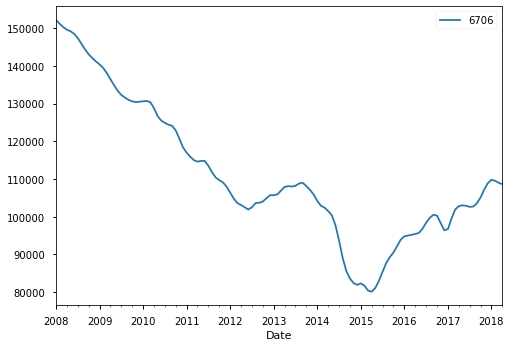

In [10]:
#Observing the Time Series
ts = ts_df[zipcode].copy()
ax = ts.plot()
ax.legend()
plt.show()

With the visualization above we can understand how home values in a ZIP Code have moved month over month and year over year. We are ready to navigate Time-Series deeper and set up for our predicting models. 

### Set up for Modeling - Conceptual Soundness

#### Understanding Time Series, Lags, Components, ACF & PACF

##### Components of Time-Series

Time Series have major components that can affect the lags or how the lags are shown, such as: 
- Trend component.
- Seasonal component.
- Cyclical component.
- Irregular component. 

To make sure that these don't affect the model, the goal is make the trend on these lags more even. In modeling I can then difference the trend or transform the trend to make the lags more even.

#####  Lags

To understand Time-Series we are introduced first to the concept of lags. A lag is the period of time between one time series index and another one. A lag is value of time gap being considered. 

A lag 1 autocorrelation is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart. The number of lags is typically small of 1 or 2 lags. For the purpose of this project,given that this is montly data, my approach is 20 lags (usually the appropriate lags for monthly data is 6, 12 or 24 lags, depending on sufficient data points and for quarterly data, 1 to 8 lags). This concept will play a part in understanding the components of Time-Series. 

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into the components explained above, each representing an underlying pattern category. 
To do this, we have to understand Auto Correlations and Partial Auto Correlations. 

#### ACF & PACF of Time-Series

- ACF

Autocorrelation is a measure of how much the data sets at one point in time influences data sets at a later point in time- ACF seeks to identify how correlated the values in a time series are with each other.  

The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number of periods or units. In essence, its a measure of the link between the present and the past, therefore it helps us identify the moving average.

- PACF

Partial Autocorrelation (PACF) is a measure, that can plot the partial correlation coefficients between the series and lags of itself. In general, the "partial" correlation between two variables is the amount of correlation between them, which is not explained by their mutual correlations with a specified set of other variables.

In general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. PACF therefore helps us identify the Auto regressive order. PACF measures directs effects a.k.a Auto Regressive.

###### WHAT IS THE DIFFERENCE BETWEEN ACF and PACF ?

Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

Both, ACF and PACF can provide valuable insights into the behaviour of time series data. They are often used to decide the number of Autoregressive (AR) and Moving Average (MA) lags for the ARIMA models. Moreover, they can also help detect any seasonality within the data. The correct application and interpretation are essential in extracting useful information from the ACF and PACF plots.

ACF and PACF can provide valuable insights into the behaviour of time series data. They are often used to decide the number of Autoregressive (AR) and Moving Average (MA) lags for the ARIMA models. Moreover, they can also help detect any seasonality within the data. The correct application and interpretation are essential in extracting useful information from the ACF and PACF plots.

#### STATS MODELS- Coding for ACF & PACF

First, we'll be importing libraries that will help up to this effect followed by plotting and visualization to understand the time-series data.

#### Importing relevant libraries

In [11]:
#For time series decomposition season decompose
from statsmodels.tsa.seasonal import seasonal_decompose
#Statsmodels for plotting the acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Pandas plotting import
from pandas.plotting import autocorrelation_plot,lag_plot
#Defining plot
def plot_acf_pacf(ts, figsize=(10,8),lags=24):
    
    fig,ax = plt.subplots(nrows=3,
                          figsize=figsize)
    
    ## Plot ts
    ts.plot(ax=ax[0])
    
    ## Plot acf, pavf
    plot_acf(ts,ax=ax[1],lags=lags)
    plot_pacf(ts, ax=ax[2],lags=lags) 
    fig.tight_layout()
    
    fig.suptitle(f"Zipcode: {ts.name}",y=1.1,fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

#### Plots ACF & PACF

My approach with annual data is 20 lags. The number of lags is typically small, 1 or 2 lags. For quarterly data, 1 to 8 lags is appropriate, and for monthly data, 6, 12 or 24 lags can be used given sufficient data points.

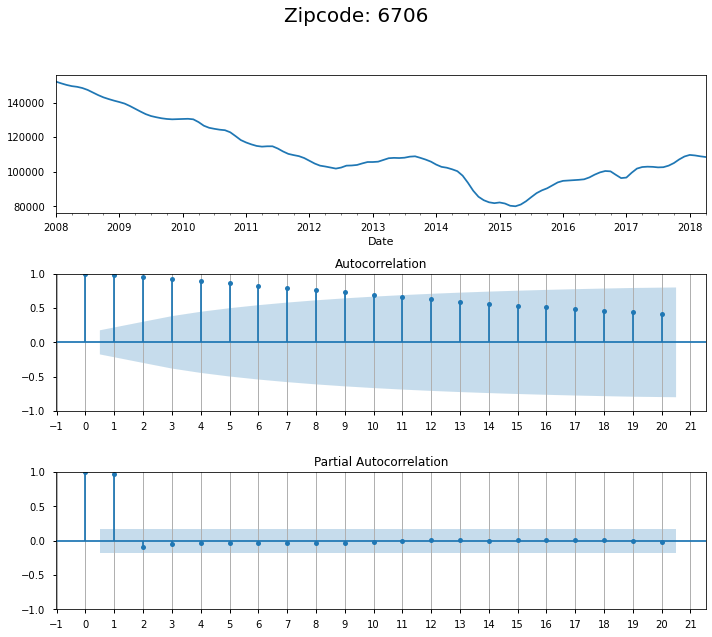

In [12]:
plot_acf_pacf(ts,lags=20);

##### Next, Differencing- technique to transform time-series

### Differencing Transformation

Differencing is a technique to transform a non-stationary time series into a stationary one. It involves subtracting the current value of the series from the previous one, or from a lagged value. It can be used to remove the series dependence on time like trends and seasonality. This is an important step in preparing the data used in ARIMA Modeling. To do this we can code a new plot showing the differencing applied. Let's also understand the sub-components of Auto Correlation and Partial Autocorrelation.

It can be used to remove the series dependence on time like trends and seasonality. This is an important step in preparing the data used in ARIMA Modeling. To do this we can code a new plot showing the differencing applied.

d= 1 below, is a parameter that refers to the number of differencing transformations required by the time series to get stationary.
By making the time series stationary I have basically made the mean and variance constant over time. It is easier to predict when the series is stationary.

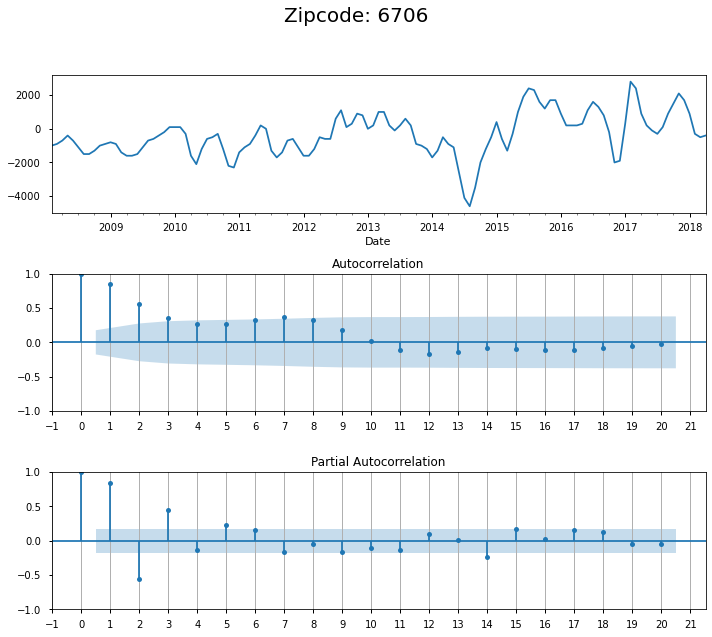

In [13]:
#Coding ts.diff Differencing
d = 1
plot_acf_pacf(ts.diff(d).dropna(),lags=20);

**Above we have detrended the series. I can now select parameters and run the first model.**

Both of these functions (ACF and PACF) measure how correlated the data at time t is to its past values t-1,t-2,… There is one crucial difference, however. The ACF also measures indirect correlation up to the lag in question, while PCAF does not.

### Modeling 

I'll be doing 2 models, one with selected parameters (I'll explain those parameters), and the second one with parameters provided by the model finding best parameters.

#### Selecting Parameters

ARIMA models are made up of three different parameters or terms:


- d: The degree of differencing. Is a parameter that refers to the number of differencing transformations required by the time series to get stationary.
- p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. 
- q: The order of the moving average (MA) model. This is essentially the size of the “window” function over time series data. 

### Model 1

##### Selecting parameters

In [14]:
# selected params
#d of 1. Number of differencing transformations to make the ts stationary
d = 1
#p of 1. Order of Auto Regressive model (number of lags)
p = 1
#q of 1. Order of Moving Average. The "window sizes" of the time series data
q = 1

##### Train Test Split

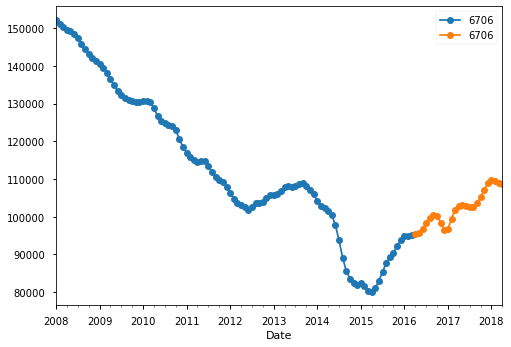

In [15]:
#selecting a training size
train_size = 0.8
#multiply train size by len of ts
split_idx = round(len(ts)* train_size)
split_idx

## split train/test for train 80% and test 20%
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

## Visualize split
fig,ax= plt.subplots()
kws = dict(ax=ax,marker='o')
train.plot(**kws)
test.plot(**kws)
ax.legend(bbox_to_anchor=[1,1])
plt.show()

Above, we see this ZIP Code's train test split

###### Running Model on Statsmodels (SARIMAX)

SARIMAX, is an extension of the ARIMA class of models. ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA). AR views the value at one time just as a weighted sum of past values. The MA model takes that same value also as a weighted sum but of past residuals. Overall, ARIMA is a very good model. However, it cannot handle seasonality, thus SARIMAX is used in this model.

##### Applying SARIMAX Model to Train data

/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6706   No. Observations:                   99
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -833.096
Date:                Thu, 06 Jul 2023   AIC                           1672.192
Time:                        14:38:28   BIC                           1679.947
Sample:                    01-01-2008   HQIC                          1675.329
                         - 03-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9769      0.010     97.349      0.000       0.957       0.997
ma.L1         -0.9999      0.101     -9.903      0.000      -1.198      -0.802
sigma2      1.558e+06   6.13e-08   2.54e+13      0.000    1.56e+06    1.56e+06
===================================================================================
Ljung-Box (L1) (Q):                  74.21   Jarque-Bera (JB):                38.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.74   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.99e+28. Standard errors may be unstable.
"""

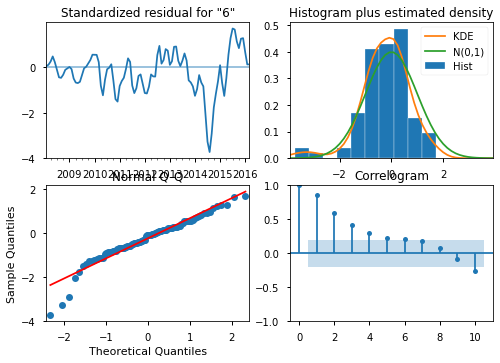

In [16]:
#Using SARIMAX because it is better to use on seasonal data 
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Baseline model from eye-balled params
model = SARIMAX(train,order=(p,d,q),).fit()
display(model.summary())
model.plot_diagnostics();
plt.show()

##### Understanding Charts Above

- Quantile Plots: 

Commonly known as Q-Q Plots, It helps answer the question: "if the set of observations approximately normally distributed?". It is a plot of the quantiles of the first data set against the quantiles of the second data set (Sample vs. Theoritical in this case).  Shows you how reliable predictions are within standard deviations. Our Mean Price, is fairly good at predictions within value. 

- Histogram plus Estimated Density (KDE)

 Undelying distribution for this data. Created bins for the data, and count the number of values creating a histogram. The KDE is the smooth out continous version of that data distribution. Allowing to estimate the probability density function. And the PDF, allows us to find the chances that the value of a random variable will occur within a range of values that you specify. More specifically, a PDF is a function where its integral for an interval provides the probability of a value occurring in that interval.

- Correlogram

A correlogram is a plot of autocorrelations . In time series data, looking at correlations between succesive correlations over time, that are periods apart (it can be 1 period or several periods apart)/For example a data group or point that you observe a month ago or a point you observed two months ago. The horizontal axis is the timeline. The blue shadows are the thresholds. The bars above the shadows are autocorrelations that are statistically significant, it is not 0 and they are related.

It answers the question: 1) Is that Data Random? It is when not all points are above threshold. 2) Is there a trend in the data? There will be a trend, when the autocorrelations coeffiecient do not fall below the critical upper limit (upper limit) at any lag . If there is a trend the data is not stationary. 

In [17]:
#Checking for the len of test
len(test)

25

##### Forecasting on Test Data

In [18]:
#Importing Library
from sklearn import metrics

#Obtaining forecast tools and set forecast code on the testing data
forecast = model.get_forecast(steps=len(test))

In [19]:
#Defining Forecast and applying it to data set test on predicted mean
def forecast_to_df(forecast,zipcode):
    test_pred = forecast.conf_int()
    test_pred[zipcode] = forecast.predicted_mean
    test_pred.columns = ['lower','upper','prediction']
    return test_pred


pred_df = forecast_to_df(forecast,zipcode)

###### Plotting Model 1

In [20]:
#Defining Plot
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots()
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['prediction'],label='prediction',ls='--',**kws)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'])
    ax.legend(bbox_to_anchor=[1,1])
    fig.tight_layout()
    return fig,ax

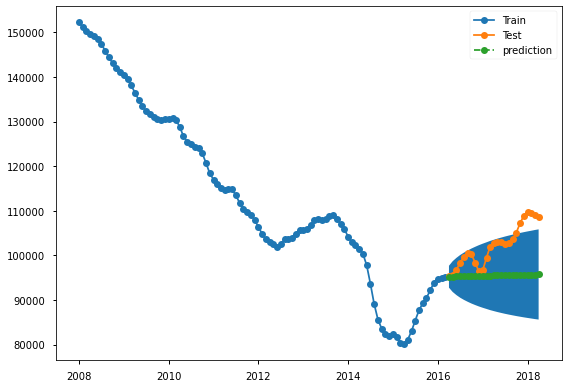

In [21]:
plot_train_test_pred(train,test,pred_df)
plt.show()

#### Conclusion on Model 1

A flat prediction line once we run the model. Let's update the parameters and find optimal parameters for prediction.

### Model 2

##### Finding optimal parameters

I want to identify the optimal parameters for my model. Pmdarima's auto_arima function is very useful when building an ARIMA model as it helps us identify the most optimal p,d,q parameters and return a fitted model.

In [22]:
#@!pip install pmdarima

In [23]:
#importing libraries
from pmdarima.arima import auto_arima

##### Applying to Train Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -833.565
Date:                Thu, 06 Jul 2023   AIC                           1671.131
Time:                        14:38:35   BIC                           1676.301
Sample:                    01-01-2008   HQIC                          1673.222
                         - 03-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -581.6327    121.477     -4.788      0.000    -819.723    -343.542
sigma2      1.431e+06    1.6e+05      8.956      0.000    1.12e+06    1.74e+06
===================================================================================
Ljung-Box (L1) (Q):                  75.43   Jarque-Bera (JB):                 7.58
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               7.58   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

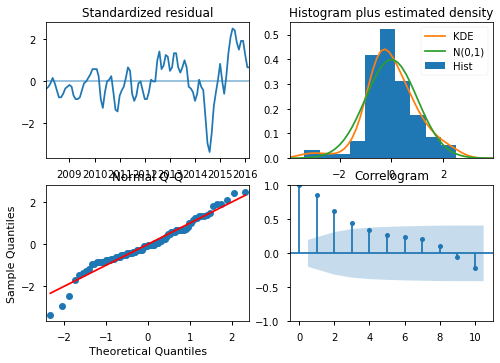

In [24]:
auto_model = auto_arima(train,start_p=0,start_q=0)
display(auto_model.summary())
auto_model.plot_diagnostics();

In [25]:
#organize panda data frame into date range , with 10 periods, frequency by month
pd.date_range(train.index[-1], periods=10,freq='M')


DatetimeIndex(['2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

Date ranges (pd.date_range) is like a "date ruler". You have a start and end time, the frequency of how I'd like to split the dates by. 

In [26]:
#showing the index of train data
train.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
      

In [27]:
#predictive models mean 
pred_mean,pred_conf_int = auto_model.predict(return_conf_int=True)
pred_mean

2016-04-01    94618.367347
2016-05-01    94036.734694
2016-06-01    93455.102041
2016-07-01    92873.469388
2016-08-01    92291.836735
2016-09-01    91710.204082
2016-10-01    91128.571429
2016-11-01    90546.938776
2016-12-01    89965.306122
2017-01-01    89383.673469
Freq: MS, dtype: float64

#### GridSearch Hyperparameter

Grid search
The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a hold-out validation set.

In [28]:
#Grid Parameters
pred_df = pd.DataFrame({'pred':pred_mean, 
                        'conf_int_lower':pred_conf_int[:,0],
                        'conf_int_upper':pred_conf_int[:,1]},
                        index= pd.date_range(test.index[0],
                                                  periods=10,freq='M'))
# auto_model.conf_int()
pred_df

,pred,conf_int_lower,conf_int_upper
2016-04-30,NaN,92274.031616,96962.703077
2016-05-31,NaN,90721.343309,97352.126079
2016-06-30,NaN,89394.593446,97515.610636
2016-07-31,NaN,88184.797927,97562.140849
2016-08-31,NaN,87049.742679,97533.930790
2016-09-30,NaN,85967.777756,97452.630407
2016-10-31,NaN,84926.042096,97331.100761
2016-11-30,NaN,83916.156006,97177.721545
2016-12-31,NaN,82932.298931,96998.313314
2017-01-31,NaN,81970.232961,96797.113978


In [29]:
train.index[-1]

Timestamp('2016-03-01 00:00:00')

In [30]:
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

##### Mean Square Error (Test)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
auto_model = auto_arima(test, m=12)

In [33]:
test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 25 entries, 2016-04-01 to 2018-04-01
Series name: 6706
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [34]:
#organize panda data frame into date range , with 25 periods, frequency by month
pd.date_range(test.index[0], periods=25,freq='M')

DatetimeIndex(['2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='M')

In [35]:
#showing test index
test_df = test.reset_index()
test_df= test_df.rename(columns= {'index': 'Date'})
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25 non-null     datetime64[ns]
 1   6706    25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.0 bytes


In [36]:
test.head()

Date
2016-04-01    95400.0
2016-05-01    95700.0
2016-06-01    96800.0
2016-07-01    98400.0
2016-08-01    99700.0
Name: 6706, dtype: float64

In [37]:
test.index[-1]

Timestamp('2018-04-01 00:00:00')

In [38]:
test_df.set_index('Date')

,6706
Date,
2016-04-01,95400.0
2016-05-01,95700.0
2016-06-01,96800.0
2016-07-01,98400.0
2016-08-01,99700.0
2016-09-01,100500.0
2016-10-01,100300.0
2016-11-01,98300.0
2016-12-01,96400.0


In [39]:
#predictive models mean 
pred_mean_test,pred_conf_int = auto_model.predict(return_conf_int=True)
pred_test_df= pred_mean_test.reset_index() 
pred_test_df= pred_test_df.rename(columns= {'index': 'Date'})
pred_test_df= pred_test_df.rename(columns= {0: '6706'})
pred_test_df.head()


,Date,6706
0,2018-05-01,109150.0
1,2018-06-01,109700.0
2,2018-07-01,110250.0
3,2018-08-01,110800.0
4,2018-09-01,111350.0


In [40]:
print (pred_conf_int)

[[106855.22336598 111444.77663402]
 [106454.69576155 112945.30423845]
 [106275.33027786 114224.66972214]
 [106210.44673196 115389.55326804]
 [106218.72345316 116481.27654684]
 [106278.96817299 117521.03182701]
 [106378.59171195 118521.40828805]
 [106509.39152311 119490.60847689]
 [106665.67009795 120434.32990205]
 [106843.27911517 121356.72088483]]


In [41]:
pred_test_df.set_index('Date')

,6706
Date,
2018-05-01,109150.0
2018-06-01,109700.0
2018-07-01,110250.0
2018-08-01,110800.0
2018-09-01,111350.0
2018-10-01,111900.0
2018-11-01,112450.0
2018-12-01,113000.0
2019-01-01,113550.0


In [42]:
pred_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10 non-null     datetime64[ns]
 1   6706    10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


In [43]:
pd.date_range(pred_mean_test.index[0], periods=25,freq='M')

DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [44]:
test_df.merge(pred_test_df, how= 'outer', indicator= True)._merge.value_counts()

_merge
left_only     25
right_only    10
both           0
Name: count, dtype: int64

In [45]:
mse_df= test_df.merge(pred_test_df, how= 'outer', indicator= True)

In [46]:
mse_df.set_index ('Date')

,6706,_merge
Date,,
2016-04-01,95400.0,left_only
2016-05-01,95700.0,left_only
2016-06-01,96800.0,left_only
2016-07-01,98400.0,left_only
2016-08-01,99700.0,left_only
2016-09-01,100500.0,left_only
2016-10-01,100300.0,left_only
2016-11-01,98300.0,left_only
2016-12-01,96400.0,left_only


In [47]:
#y_forecasted = pred           #what is this vector ? 
#y_truth = y['1998-01-01':]   # What is this vector ?
# Compute the mean square error
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [48]:
#calculating the MSE and RMSE 
expected =  test_df.tail(10)['6706']    # what is this vector value? 
forecast =  pred_test_df ['6706']
mean_squared_error( expected, forecast, squared= False)

5148.422088368436

In [49]:
#calculating the MSE and RMSE 
expected =  test_df.tail(10)['6706']    # what is this vector value? 
forecast =  pred_test_df ['6706']
mse= mean_squared_error( expected, forecast)
RMSE= sqrt (mse)
print (RMSE)

5148.422088368436


In [50]:
y_min=test_df.min()['6706']


In [51]:
y_max=test_df.max() ['6706']

In [52]:
Norm_divide= y_max-y_min

In [53]:
RMSE/Norm_divide

0.3575293116922525

In [54]:
#another way of finding rmse
#def find_rmse(model, test=test):
#    y_hat = model.predict(type='levels')
#    return np.sqrt(mean_squared_error(train_data, y_hat))

## Best Model Plot

/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6706   No. Observations:                  124
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1058.117
Date:                Thu, 06 Jul 2023   AIC                           2118.234
Time:                        14:38:44   BIC                           2121.046
Sample:                    01-01-2008   HQIC                          2119.376
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.722e+06   1.85e+05      9.330      0.000    1.36e+06    2.08e+06
===================================================================================
Ljung-Box (L1) (Q):                  90.11   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               1.38   Skew:                            -0.12
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

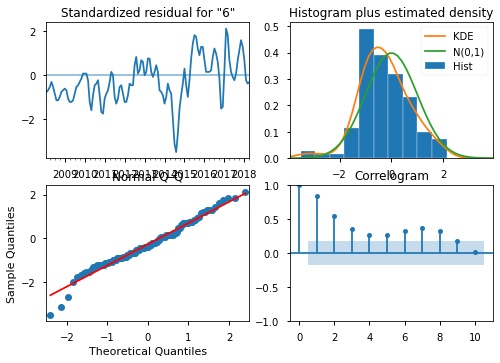

In [55]:
best_model = SARIMAX(ts,order=auto_model.order,
                     seasonal_order=auto_model.seasonal_order).fit()
display(best_model.summary())
best_model.plot_diagnostics();

### Forecast

(<Figure size 576x396 with 1 Axes>, <AxesSubplot:>)

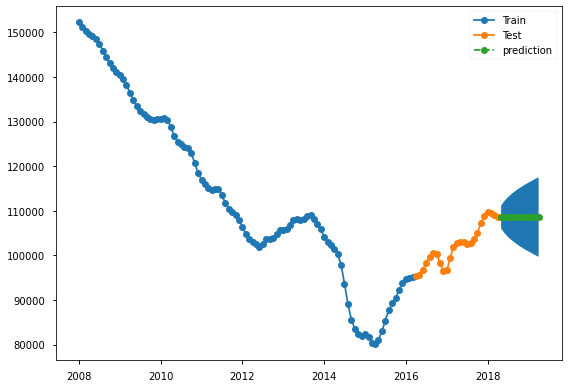

In [56]:
pred = best_model.get_forecast(steps=12)#start=test.index[0],end=test.index[-1])
pred_df = forecast_to_df(pred,zipcode)
display(plot_train_test_pred(train,test,pred_df));
plt.show()

#### Loop Best Model Forecast for the 13 best ROI ZIP Codes

6606
RMSE for this ZIP Code is 0.1587860300220871


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6606   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -981.444
Date:                Thu, 06 Jul 2023   AIC                           1964.889
Time:                        14:38:45   BIC                           1967.693
Sample:                    01-01-2008   HQIC                          1966.028
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.687e+05   7.03e+04      8.088      0.000    4.31e+05    7.07e+05
===================================================================================
Ljung-Box (L1) (Q):                  24.65   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.00   Prob(JB):                         0.89
Heteroskedasticity (H):               0.88   Skew:                            -0.07
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

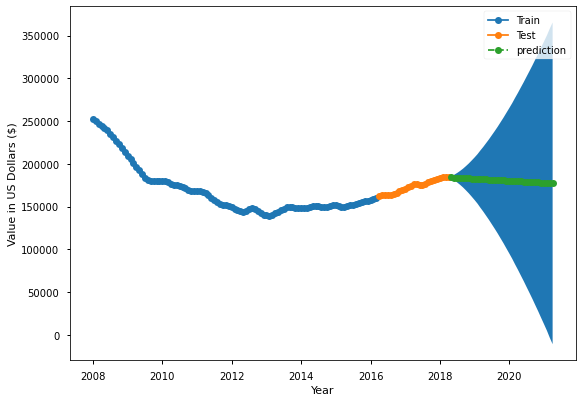

------------------------------------------------------------

6705
RMSE for this ZIP Code is 0.6419032529123976


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6705   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -988.968
Date:                Thu, 06 Jul 2023   AIC                           1979.936
Time:                        14:38:45   BIC                           1982.740
Sample:                    01-01-2008   HQIC                          1981.075
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.433e+05   5.56e+04     11.567      0.000    5.34e+05    7.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.23   Jarque-Bera (JB):                29.06
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               8.38   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

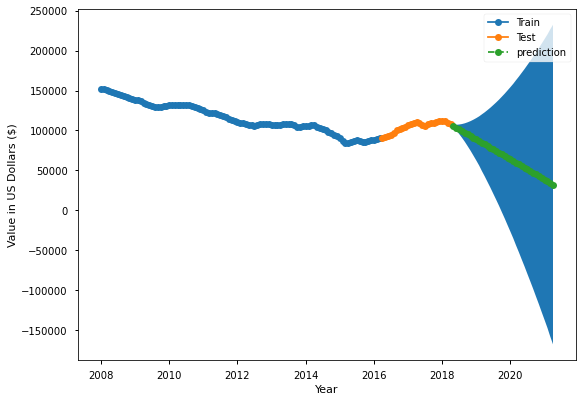

------------------------------------------------------------

6604
RMSE for this ZIP Code is 0.679199327926642


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6604   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1037.801
Date:                Thu, 06 Jul 2023   AIC                           2077.601
Time:                        14:38:46   BIC                           2080.405
Sample:                    01-01-2008   HQIC                          2078.740
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.433e+06   1.37e+05     10.481      0.000    1.16e+06     1.7e+06
===================================================================================
Ljung-Box (L1) (Q):                  25.97   Jarque-Bera (JB):                17.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.44
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

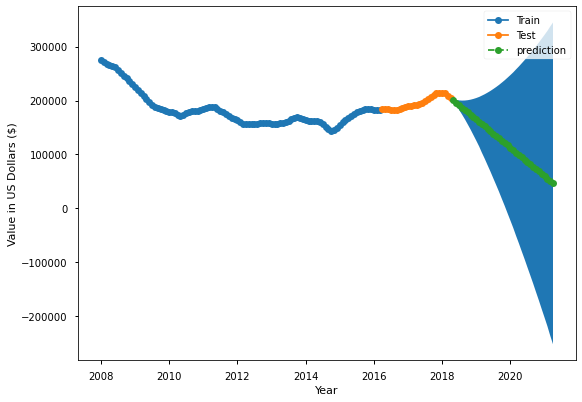

------------------------------------------------------------

6610
RMSE for this ZIP Code is 0.4811398924158764


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6610   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1020.305
Date:                Thu, 06 Jul 2023   AIC                           2042.611
Time:                        14:38:46   BIC                           2045.415
Sample:                    01-01-2008   HQIC                          2043.750
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.075e+06   1.21e+05      8.876      0.000    8.38e+05    1.31e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.49   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.00   Prob(JB):                         0.40
Heteroskedasticity (H):               0.59   Skew:                            -0.05
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

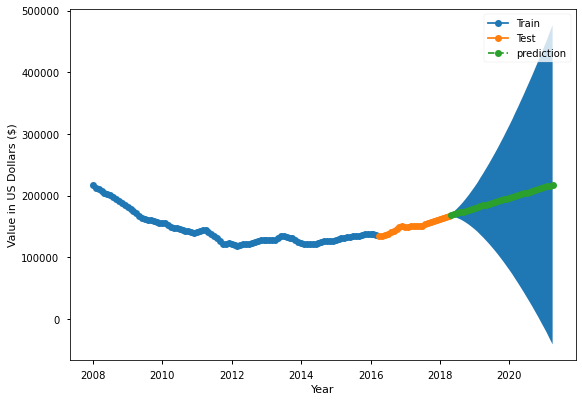

------------------------------------------------------------

6351
RMSE for this ZIP Code is 0.3915829702516274


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6351   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1029.220
Date:                Thu, 06 Jul 2023   AIC                           2060.440
Time:                        14:38:46   BIC                           2063.244
Sample:                    01-01-2008   HQIC                          2061.579
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.245e+06   1.63e+05      7.657      0.000    9.26e+05    1.56e+06
===================================================================================
Ljung-Box (L1) (Q):                  22.25   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.00   Prob(JB):                         0.91
Heteroskedasticity (H):               1.45   Skew:                            -0.09
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

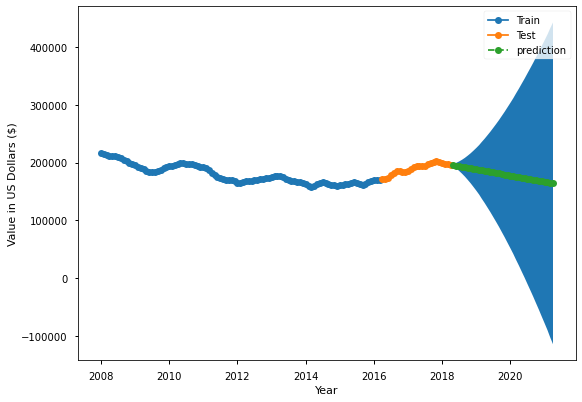

------------------------------------------------------------

6706
RMSE for this ZIP Code is 0.16234803328172337


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6706   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -973.334
Date:                Thu, 06 Jul 2023   AIC                           1948.668
Time:                        14:38:47   BIC                           1951.472
Sample:                    01-01-2008   HQIC                          1949.807
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.979e+05   5.11e+04      9.744      0.000    3.98e+05    5.98e+05
===================================================================================
Ljung-Box (L1) (Q):                  24.05   Jarque-Bera (JB):                 7.46
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               3.22   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

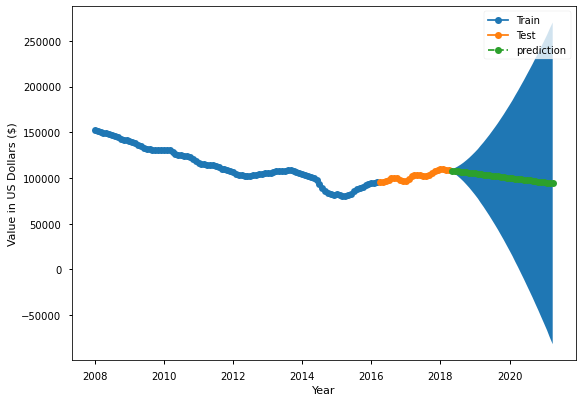

------------------------------------------------------------

6359
RMSE for this ZIP Code is 0.3195441881410846


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6359   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1026.891
Date:                Thu, 06 Jul 2023   AIC                           2055.781
Time:                        14:38:47   BIC                           2058.585
Sample:                    01-01-2008   HQIC                          2056.920
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.198e+06   1.44e+05      8.343      0.000    9.17e+05    1.48e+06
===================================================================================
Ljung-Box (L1) (Q):                  17.11   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.00   Prob(JB):                         0.29
Heteroskedasticity (H):               1.50   Skew:                             0.32
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

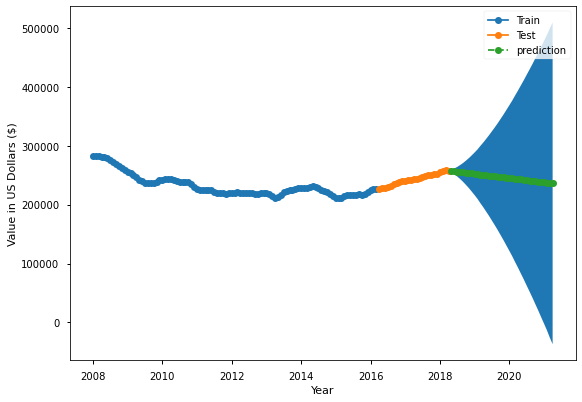

------------------------------------------------------------

6069
RMSE for this ZIP Code is 1.9020968066122308


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6069   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1137.265
Date:                Thu, 06 Jul 2023   AIC                           2276.529
Time:                        14:38:48   BIC                           2279.333
Sample:                    01-01-2008   HQIC                          2277.668
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.199e+06   8.17e+05      8.815      0.000     5.6e+06     8.8e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.11   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.02   Prob(JB):                         0.58
Heteroskedasticity (H):               2.26   Skew:                             0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

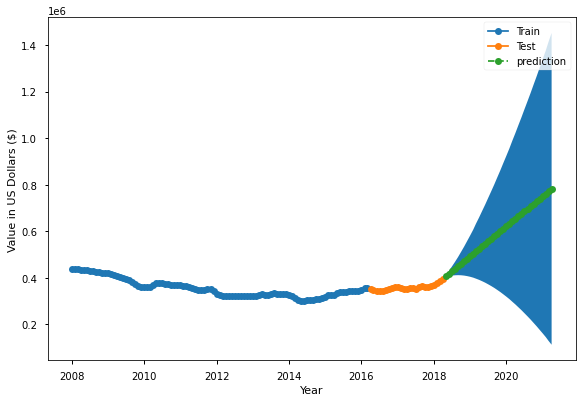

------------------------------------------------------------

6330
RMSE for this ZIP Code is 0.43320550764014154


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6330   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1016.221
Date:                Thu, 06 Jul 2023   AIC                           2034.441
Time:                        14:38:48   BIC                           2037.245
Sample:                    01-01-2008   HQIC                          2035.580
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.006e+06   1.32e+05      7.612      0.000    7.47e+05    1.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   7.25   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.01   Prob(JB):                         0.78
Heteroskedasticity (H):               1.92   Skew:                            -0.15
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

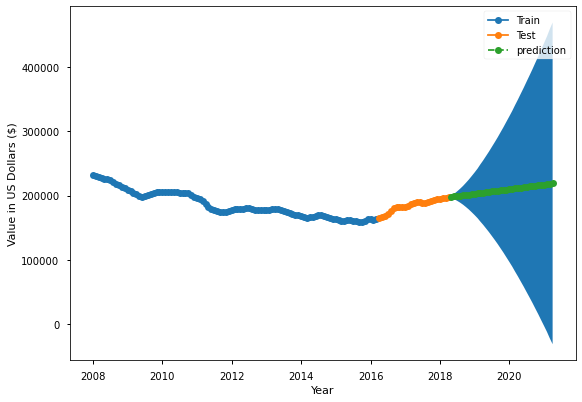

------------------------------------------------------------

6039
RMSE for this ZIP Code is 0.6428389700020414


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6039   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1177.615
Date:                Thu, 06 Jul 2023   AIC                           2357.229
Time:                        14:38:48   BIC                           2360.033
Sample:                    01-01-2008   HQIC                          2358.368
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.395e+07   1.54e+06      9.052      0.000    1.09e+07     1.7e+07
===================================================================================
Ljung-Box (L1) (Q):                  13.80   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.62   Skew:                            -0.55
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

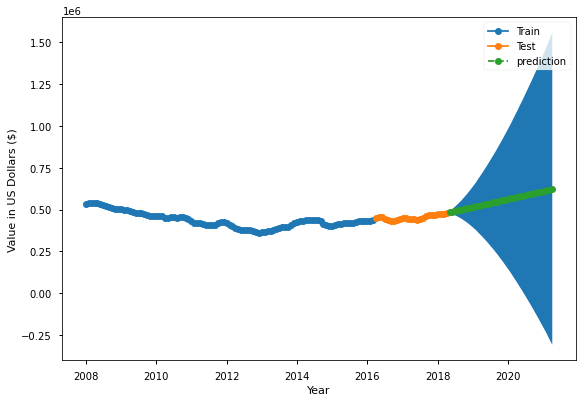

------------------------------------------------------------

6235
RMSE for this ZIP Code is 0.4230978182757336


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6235   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1027.650
Date:                Thu, 06 Jul 2023   AIC                           2057.299
Time:                        14:38:49   BIC                           2060.103
Sample:                    01-01-2008   HQIC                          2058.438
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.213e+06   1.23e+05      9.891      0.000    9.73e+05    1.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.93   Jarque-Bera (JB):                 7.58
Prob(Q):                              0.01   Prob(JB):                         0.02
Heteroskedasticity (H):               0.95   Skew:                             0.12
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

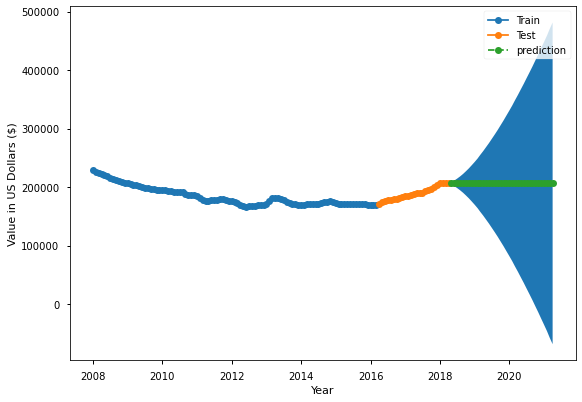

------------------------------------------------------------

6068
RMSE for this ZIP Code is 0.2197566441907544


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6068   No. Observations:                  124
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1255.669
Date:                Thu, 06 Jul 2023   AIC                           2513.339
Time:                        14:38:49   BIC                           2516.151
Sample:                    01-01-2008   HQIC                          2514.481
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.277e+07   4.65e+06      9.192      0.000    3.37e+07    5.19e+07
===================================================================================
Ljung-Box (L1) (Q):                  79.29   Jarque-Bera (JB):                 3.47
Prob(Q):                              0.00   Prob(JB):                         0.18
Heteroskedasticity (H):               1.13   Skew:                            -0.24
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

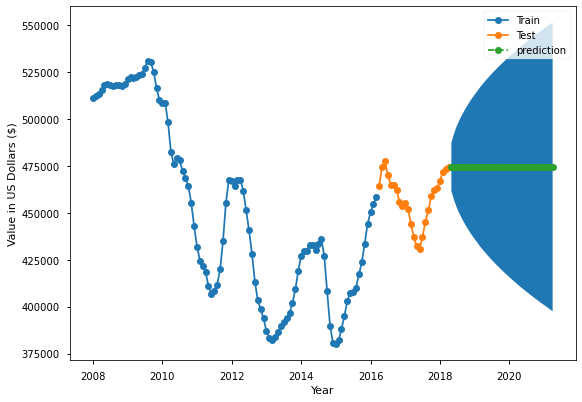

------------------------------------------------------------

6796
RMSE for this ZIP Code is 0.17276426242244192


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   6796   No. Observations:                  124
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1242.396
Date:                Thu, 06 Jul 2023   AIC                           2486.793
Time:                        14:38:50   BIC                           2489.605
Sample:                    01-01-2008   HQIC                          2487.935
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.447e+07   4.32e+06      7.972      0.000     2.6e+07    4.29e+07
===================================================================================
Ljung-Box (L1) (Q):                  73.39   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.70   Skew:                             0.09
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

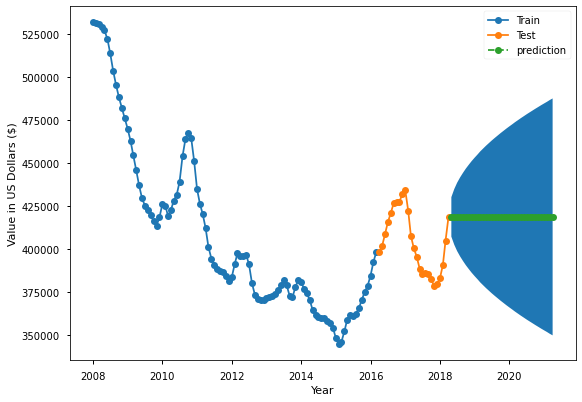

------------------------------------------------------------



In [57]:
RESULTS = {}

for zipcode in zipcode_list:
    print(zipcode)
    
    ## Make empty dict for ZIP data
    zipcode_d = {}
    
    ## Copy Time Series
    ts = ts_df[zipcode].copy()
    
    
    ## Train Test Split Index
    train_size = 0.8
    split_idx = round(len(ts)* train_size)

    ## Split
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]
    
    
    ## Get best params using auto_arima
    gridsearch_model = auto_arima(ts,start_p=0,start_q=0)
    best_model = SARIMAX(ts,order=gridsearch_model.order,
                     seasonal_order=gridsearch_model.seasonal_order).fit()
    
    
    
    ## Get predictions
    pred  = best_model.get_forecast(steps=36)#start=test.index[0],end=test.index[-1])
    pred_df = forecast_to_df(pred,zipcode)
    
    # RMSE Fitting into all ZIP Codes
    RMSE = mean_squared_error(ts.tail(36), pred_df['prediction'], squared= False)
    y_min = ts.min()
    y_max = ts.max()
    Norm_divide = y_max-y_min
    Norm = RMSE/Norm_divide
    print (f'RMSE for this ZIP Code is {Norm}')
    
    
    ## Save info to dict
    zipcode_d['pred_df'] = pred_df
    zipcode_d['model'] = best_model
    zipcode_d['train'] = train
    zipcode_d['test'] = test
    
    ## Display Results
    display(best_model.summary())
    plot_train_test_pred(train,test,pred_df)
    plt.xlabel('Year')
    plt.ylabel('Value in US Dollars ($)')
    plt.show()
    
    
    ## Save district dict in RESULTS
    RESULTS[zipcode] = zipcode_d
    print('---'*20,end='\n\n')

## Top 5 Zip Codes Recommendations

In [58]:
%store -r melted_df

##### Zip Code 6069

In [59]:
melted_df.loc[melted_df['Zipcode']=='6069']


,Zipcode,Metro,SizeRank,ROI_5yr,ROI_3yr,value
Date,,,,,,
2008-01-01,6069,Torrington,12310,0.2366,0.2412,436300.0
2008-02-01,6069,Torrington,12310,0.2366,0.2412,437000.0
2008-03-01,6069,Torrington,12310,0.2366,0.2412,436300.0
2008-04-01,6069,Torrington,12310,0.2366,0.2412,434900.0
2008-05-01,6069,Torrington,12310,0.2366,0.2412,433700.0
...,...,...,...,...,...,...
2017-12-01,6069,Torrington,12310,0.2366,0.2412,365800.0
2018-01-01,6069,Torrington,12310,0.2366,0.2412,370900.0
2018-02-01,6069,Torrington,12310,0.2366,0.2412,375900.0


##### Zip Code 6610

In [60]:
melted_df.loc[melted_df['Zipcode']=='6610']

,Zipcode,Metro,SizeRank,ROI_5yr,ROI_3yr,value
Date,,,,,,
2008-01-01,6610,Stamford,4717,0.2999,0.3111,216600.0
2008-02-01,6610,Stamford,4717,0.2999,0.3111,213100.0
2008-03-01,6610,Stamford,4717,0.2999,0.3111,210100.0
2008-04-01,6610,Stamford,4717,0.2999,0.3111,207500.0
2008-05-01,6610,Stamford,4717,0.2999,0.3111,205100.0
...,...,...,...,...,...,...
2017-12-01,6610,Stamford,4717,0.2999,0.3111,160400.0
2018-01-01,6610,Stamford,4717,0.2999,0.3111,162200.0
2018-02-01,6610,Stamford,4717,0.2999,0.3111,163900.0


##### Zip Code 6330

In [61]:
melted_df.loc[melted_df['Zipcode']=='6330']

,Zipcode,Metro,SizeRank,ROI_5yr,ROI_3yr,value
Date,,,,,,
2008-01-01,6330,New London,12817,0.1107,0.2078,232100.0
2008-02-01,6330,New London,12817,0.1107,0.2078,230400.0
2008-03-01,6330,New London,12817,0.1107,0.2078,228900.0
2008-04-01,6330,New London,12817,0.1107,0.2078,227800.0
2008-05-01,6330,New London,12817,0.1107,0.2078,226700.0
...,...,...,...,...,...,...
2017-12-01,6330,New London,12817,0.1107,0.2078,194700.0
2018-01-01,6330,New London,12817,0.1107,0.2078,195200.0
2018-02-01,6330,New London,12817,0.1107,0.2078,195800.0


##### Zip Code 6039

In [62]:
melted_df.loc[melted_df['Zipcode']=='6039']

,Zipcode,Metro,SizeRank,ROI_5yr,ROI_3yr,value
Date,,,,,,
2008-01-01,6039,Torrington,13065,0.3212,0.1861,535900.0
2008-02-01,6039,Torrington,13065,0.3212,0.1861,537700.0
2008-03-01,6039,Torrington,13065,0.3212,0.1861,538100.0
2008-04-01,6039,Torrington,13065,0.3212,0.1861,538300.0
2008-05-01,6039,Torrington,13065,0.3212,0.1861,536700.0
...,...,...,...,...,...,...
2017-12-01,6039,Torrington,13065,0.3212,0.1861,468200.0
2018-01-01,6039,Torrington,13065,0.3212,0.1861,471500.0
2018-02-01,6039,Torrington,13065,0.3212,0.1861,473700.0


##### Zip Code 6058

In [63]:
melted_df.loc[melted_df['Zipcode']=='6058']

,Zipcode,Metro,SizeRank,ROI_5yr,ROI_3yr,value
Date,,,,,,
2008-01-01,6058,Torrington,13564,0.4158,0.1849,350900.0
2008-02-01,6058,Torrington,13564,0.4158,0.1849,345200.0
2008-03-01,6058,Torrington,13564,0.4158,0.1849,340000.0
2008-04-01,6058,Torrington,13564,0.4158,0.1849,336800.0
2008-05-01,6058,Torrington,13564,0.4158,0.1849,336500.0
...,...,...,...,...,...,...
2017-12-01,6058,Torrington,13564,0.4158,0.1849,286500.0
2018-01-01,6058,Torrington,13564,0.4158,0.1849,292100.0
2018-02-01,6058,Torrington,13564,0.4158,0.1849,298900.0


# Conclusion - Top 5 ZIP Codes

to Invest in these ZIP Codes due to Higher ROI

Highest projected ROI: 
- 6069 = 24.12%,
- 6610 = 31%,
- 6330 = 21%,
- 6039 = 19%,
- 6058 = 19%.